In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from pandas.io.json import json_normalize
import pymysql


plt.style.use('ggplot')
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #解决seaborn中文字体显示问题
plt.rc('figure', figsize=(10, 10))  #把plt默认的图片size调大一点
plt.rcParams["figure.dpi"] =mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline

In [134]:
# 使用MySQL数据库的情况
# conn = pymysql.connect(host="47.101.159.55", port=3306, user="root", password="GCLgcl0710", db="laborday", charset="utf8",use_unicode=True)
# cursor = conn.cursor()
# cursor.execute("select * from ticket")
# col_result = cursor.description  # 获取查询结果的字段描述
# rel = cursor.fetchall()
# columns = []
# for i in range(0, len(col_result)):
#     columns.append(col_result[i][0])
# cursor.close
# conn.close
# data1 = list(map(list, rel))
# df = pd.DataFrame(data=data1,columns=columns)  # mysql查询的结果为元组，需要转换为列表

<bound method Connection.close of <pymysql.connections.Connection object at 0x0000027387FDCC18>>

In [135]:
#将数据库中取出的数据转存到本地csv文件中
# df.to_csv(r"F:\python课程设计\workspace\LaborDay\2.csv", index=False, encoding="utf_8_sig")

In [2]:
#直接从本地读取csv数据
df=pd.read_csv(r'F:\速盘\data.csv')

In [3]:
df.sample(5)

,_id,city,fields.cityName,fields.comment,fields.discountPrice,fields.distance,fields.features,fields.featuresNew,fields.fromName,fields.h5_url,...,fields.sold365,fields.soldRecent,fields.soldRecentNum,fields.subTitle,fields.tagList,fields.title,fields.titleTagInfos,fields.type,src,trip_main_busness_type
46899,5cc71bb564eeab7d62a5d3c7,敦煌,NaN,113.0,55.0,NaN,"[{'key': None, 'text': '平均1分钟出票', 'color': Non...","[{'key': None, 'text': '平均1分钟出票', 'color': Non...",NaN,https://h5.m.taobao.com/trip/travel-detail/ind...,...,已售1095笔,月售24笔,24,NaN,[],【官方】敦煌鸣沙山月牙泉门票 敦煌旅游景点景区成人电子门票,[],NaN,mix,vocation
7037,5cc7193864eeab7d62a53811,常州,NaN,0.0,120.0,NaN,"[{'key': None, 'text': '15:00前可订今日票', 'color':...","[{'key': None, 'text': '15:00前可订今日票', 'color':...",NaN,https://h5.m.taobao.com/trip/travel-detail/ind...,...,NaN,NaN,0,NaN,[],江苏 溧阳 竹海漂流大门票 （含上游到下游之间的小交通））,[],NaN,mix,vocation
38210,5cc71b2764eeab7d62a5b1d6,三亚,NaN,0.0,135.0,NaN,"[{'key': None, 'text': '20:00前可订今日票', 'color':...","[{'key': None, 'text': '20:00前可订今日票', 'color':...",NaN,https://h5.m.taobao.com/trip/travel-detail/ind...,...,已售59笔,NaN,0,NaN,[],三亚梦幻水上乐园景区门票水世界门票儿童乐园优惠票海南旅游玩水,[],NaN,mix,vocation
6985,5cc7193764eeab7d62a537dd,常州,NaN,0.0,149.0,NaN,"[{'key': None, 'text': '出票后立即可用', 'color': Non...","[{'key': None, 'text': '出票后立即可用', 'color': Non...",NaN,https://h5.m.taobao.com/trip/travel-detail/ind...,...,NaN,NaN,0,NaN,[],常州指悦足道 门票+传统养生足疗,[],NaN,mix,vocation
4615,5cc7190f64eeab7d62a52e9b,牡丹江,NaN,0.0,45.0,NaN,"[{'key': None, 'text': '16:00前可订今日票', 'color':...","[{'key': None, 'text': '16:00前可订今日票', 'color':...",NaN,https://h5.m.taobao.com/trip/travel-detail/ind...,...,NaN,NaN,0,NaN,[],黑龙江 牡丹江 威虎山城影视城 大门票,[],NaN,mix,vocation


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54675 entries, 0 to 54674
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   _id                     54675 non-null  object 
 1   city                    54675 non-null  object 
 2   fields.cityName         0 non-null      float64
 3   fields.comment          50187 non-null  float64
 4   fields.discountPrice    54675 non-null  float64
 5   fields.distance         0 non-null      float64
 6   fields.features         54675 non-null  object 
 7   fields.featuresNew      50187 non-null  object 
 8   fields.fromName         0 non-null      float64
 9   fields.h5_url           50187 non-null  object 
 10  fields.itemId           54675 non-null  int64  
 11  fields.itemTotalScore   50187 non-null  float64
 12  fields.latitude         54675 non-null  float64
 13  fields.longitude        54675 non-null  float64
 14  fields.native_url       0 non-null    

### 1. 清洗数据
#### 1.1 把需要的字段挑出来

In [5]:
df.columns

Index(['_id', 'city', 'fields.cityName', 'fields.comment',
       'fields.discountPrice', 'fields.distance', 'fields.features',
       'fields.featuresNew', 'fields.fromName', 'fields.h5_url',
       'fields.itemId', 'fields.itemTotalScore', 'fields.latitude',
       'fields.longitude', 'fields.native_url', 'fields.p_score',
       'fields.pc_url', 'fields.picUrl', 'fields.price', 'fields.scm',
       'fields.shortInfo', 'fields.sold365', 'fields.soldRecent',
       'fields.soldRecentNum', 'fields.subTitle', 'fields.tagList',
       'fields.title', 'fields.titleTagInfos', 'fields.type', 'src',
       'trip_main_busness_type'],
      dtype='object')

In [6]:
df.iloc[55]

_id                                                5cc718a064eeab7d62a51ccb
city                                                                    石家庄
fields.cityName                                                         NaN
fields.comment                                                            0
fields.discountPrice                                                  116.9
fields.distance                                                         NaN
fields.features           [{'key': None, 'text': '18:00前可订今日票', 'color':...
fields.featuresNew        [{'key': None, 'text': '18:00前可订今日票', 'color':...
fields.fromName                                                         NaN
fields.h5_url             https://h5.m.taobao.com/trip/travel-detail/ind...
fields.itemId                                                  588857206136
fields.itemTotalScore                                                     0
fields.latitude                                                           0
fields.longi

In [7]:
col_keep = ['city', 'fields.comment', 'fields.discountPrice', 'fields.features', 'fields.itemId',
           'fields.itemTotalScore', 'fields.latitude', 'fields.longitude', 'fields.price',
           'fields.shortInfo', 'fields.sold365', 'fields.soldRecentNum', 'fields.tagList', 
            'fields.title', 'trip_main_busness_type']
df = df[col_keep]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54675 entries, 0 to 54674
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    54675 non-null  object 
 1   fields.comment          50187 non-null  float64
 2   fields.discountPrice    54675 non-null  float64
 3   fields.features         54675 non-null  object 
 4   fields.itemId           54675 non-null  int64  
 5   fields.itemTotalScore   50187 non-null  float64
 6   fields.latitude         54675 non-null  float64
 7   fields.longitude        54675 non-null  float64
 8   fields.price            54675 non-null  float64
 9   fields.shortInfo        50187 non-null  object 
 10  fields.sold365          32193 non-null  object 
 11  fields.soldRecentNum    54675 non-null  int64  
 12  fields.tagList          54675 non-null  object 
 13  fields.title            54675 non-null  object 
 14  trip_main_busness_type  54675 non-null

In [9]:
df.sample(5)

,city,fields.comment,fields.discountPrice,fields.features,fields.itemId,fields.itemTotalScore,fields.latitude,fields.longitude,fields.price,fields.shortInfo,fields.sold365,fields.soldRecentNum,fields.tagList,fields.title,trip_main_busness_type
21281,青岛,6.0,58.0,"[{'key': None, 'text': '08:00前可订今日票', 'color':...",566808461521,5.0,0.0000,0.000,58.0,青岛,已售73笔,37,[],【官方授权】青岛黄岛大珠山森林公园旅游景区景点年卡全年不限次,vocation
7721,苏州,NaN,53.0,"[{'key': '一句话描述', 'text': '不同厅堂有着不同风格，穿着汉服走在里面...",953,NaN,31.3154,120.592,53.0,NaN,NaN,1932,"[{'text': '5A景区', 'icon': None, 'borderColor':...",留园,scenic
54211,澳门,0.0,278.0,"[{'key': None, 'text': '14:50前可订今日票', 'color':...",587977344788,0.0,0.0000,0.000,278.0,澳门,NaN,0,[],出票快澳门旅游塔观光塔大门票+新濠影汇酒店狂电派C区门票电子券,vocation
46676,酒泉,1.0,120.0,"[{'key': None, 'text': '出票后立即可用', 'color': Non...",558139793708,4.0,0.0000,0.000,120.0,酒泉,已售35笔,0,[],【官方】敦煌鸣沙山月牙泉沙漠摩托车线路1号线娱乐门票 电子票,vocation
4139,哈尔滨,16.0,115.0,"[{'key': None, 'text': '出票后30分可用', 'color': No...",546719570392,4.8,0.0000,0.000,115.0,哈尔滨,已售73笔,0,[],永泰城世界主题乐园大门票 单人票 电子票 随时出,vocation


1.2 去重

In [10]:
df.drop_duplicates(subset='fields.itemId', inplace=True)

#### 1.3 数据类型转换

In [11]:
# 由于np.nan是float，所以这里整体转换为float
df.loc[df['fields.comment'].isnull(), 'fields.comment'] = np.nan
df['fields.comment'] = df['fields.comment'].astype(float)

In [12]:
df['fields.discountPrice'] = df['fields.discountPrice'].astype(float)
df['fields.itemId'] = df['fields.itemId'].astype(int)
df['fields.price'] = df['fields.price'].astype(float)
df['fields.soldRecentNum'] = df['fields.soldRecentNum'].astype(int)

#### 1.4 各字段清洗
- fields.features
- fields.sold365
- fields.tagList

In [13]:
# fields.features清洗改正版
def get_fea_text(df):
    
    if len(df)>0:
        a=eval(df)
        if a :
            return a[0]['text']
        else:
            return None
    else:
        return None


df['fields.features'] = df['fields.features'].apply(get_fea_text)

In [14]:
# fields.features清洗源代码
# def get_fea_text(df):
#     if len(df) > 0:
#         return df[0]['text']
#     else:
#         return None


# df['fields.features'] = df['fields.features'].apply(get_fea_text)

In [15]:
df['fields.sold365'].sample(5)

17467       NaN
11470      已售3笔
33650     已售16笔
15308    已售871笔
12003      已售9笔
Name: fields.sold365, dtype: object

In [16]:
# fields.sold365清洗
def get_sold365(df):
    if df is np.nan:
        return np.nan
    if "万" in df:
        return float(df[df.find('售')+1:df.find('万')]) * 10000
    else:
        return float(df[df.find('售')+1:df.find('笔')])

    
df['fields.sold365'] = df['fields.sold365'].apply(get_sold365)

In [17]:
df['fields.tagList'].sample(5)

32939    []
53496    []
12934    []
37003    []
2036     []
Name: fields.tagList, dtype: object

In [18]:
# fields.tagList清洗
df['fields.tagList'] = df['fields.tagList'].apply(get_fea_text)

#### 1.5 跟省份数据merge在一起

In [19]:
city_data = pd.read_csv('city_data.csv')

In [20]:
city_data.head()

,city,province
0,石家庄,河北省
1,邯郸,河北省
2,唐山,河北省
3,保定,河北省
4,秦皇岛,河北省


In [21]:
data_final = df.merge(city_data, on='city')

In [22]:
data_final.sample(5)

,city,fields.comment,fields.discountPrice,fields.features,fields.itemId,fields.itemTotalScore,fields.latitude,fields.longitude,fields.price,fields.shortInfo,fields.sold365,fields.soldRecentNum,fields.tagList,fields.title,trip_main_busness_type,province
42244,中卫,69.0,28.0,16:00前可订今日票,-1061318358,5.0,0.0,0.0,28.0,中卫,777.0,9,None,宁夏中卫沙坡头景区黄河3D玻璃桥 沙坡头3D桥电子票当天可订,vocation,宁夏回族自治区
11768,金华,0.0,155.0,最早可定明日票,-2049549165,0.0,0.0,0.0,155.0,金华,13.0,0,None,横店影视城秦王宫大门票演艺秀团购成人儿童老人教师票【秦王宫】,vocation,浙江省
13008,芜湖,92.0,340.0,08:00前可订今日票,-325400733,4.9,0.0,0.0,340.0,芜湖,872.0,39,None,芜湖方特2日2园套票水上乐园东方神画梦幻王国票欢乐世界不排队票,vocation,安徽省
41580,酒泉,0.0,368.0,17:00前可订今日票,1616560741,0.0,0.0,0.0,368.0,酒泉,4.0,4,None,【官方出票】《丝路花雨》A区大型情景歌舞剧 复活的敦煌壁画舞姿,vocation,甘肃省
29701,江门,0.0,66.0,21:30前可订今日票,1625534680,0.0,0.0,0.0,66.0,江门,NaN,0,None,ZY【即定即用】广东江门恩平锦江温泉 成人儿童温泉票 含鱼疗票,vocation,广东省


In [23]:
data_final.to_csv('data_clean.csv', index=False)

In [24]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48537 entries, 0 to 48536
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    48537 non-null  object 
 1   fields.comment          44643 non-null  float64
 2   fields.discountPrice    48537 non-null  float64
 3   fields.features         48332 non-null  object 
 4   fields.itemId           48537 non-null  int32  
 5   fields.itemTotalScore   44643 non-null  float64
 6   fields.latitude         48537 non-null  float64
 7   fields.longitude        48537 non-null  float64
 8   fields.price            48537 non-null  float64
 9   fields.shortInfo        44643 non-null  object 
 10  fields.sold365          28057 non-null  float64
 11  fields.soldRecentNum    48537 non-null  int32  
 12  fields.tagList          1743 non-null   object 
 13  fields.title            48537 non-null  object 
 14  trip_main_busness_type  48537 non-null

### 问题
1. 哪些城市/省份的旅游选择最多？
2. 哪些城市最受游客青睐？
3. 最热门的景点
4. 各省份的好评热门景点
5. 很热门但是评分不好的景点
6. 打折力度最大的景点
7. 各级别景区的门票价格

#### 1. 哪些城市/省份的旅游选择最多？

In [25]:
count_top12 = data_final['fields.shortInfo'].value_counts()[:12]

In [32]:
from pyecharts.charts.funnel import Funnel

funnel = Funnel("旅游选择最多的前12个城市", width = 800,height=600)
funnel.add("", count_top12.index, count_top12.values, legend_top=30,
           xaxis_label_textsize=20, yaxis_label_textsize=14, is_label_show=True,
          )
funnel

In [33]:
count_province_top10 = data_final['province'].value_counts()

In [34]:
count_province_top10

广东省         4943
浙江省         4688
海南省         3907
江苏省         3889
山东省         2853
福建省         2818
广西壮族自治区     2391
湖北省         2106
北京市         1658
安徽省         1610
四川省         1548
云南省         1541
辽宁省         1480
河北省         1403
上海市         1358
河南省         1313
江西省         1255
陕西省         1104
重庆市          955
香港           923
湖南省          778
澳门           644
黑龙江省         604
甘肃省          467
天津市          430
贵州省          368
山西省          364
宁夏回族自治区      305
吉林省          271
内蒙古自治区       151
台湾           142
西藏自治区        141
新疆维吾尔自治区      90
青海省           39
Name: province, dtype: int64

In [35]:
province = [pro.replace("省", "") for pro in list(count_province_top10.index)]
province = [pro.replace("市", "") for pro in province]

In [36]:
province = ['广东','浙江','海南','江苏','山东','福建','广西','湖北','北京','安徽','四川','云南',
            '辽宁','河北','上海','河南','江西','陕西','重庆','香港','湖南','澳门','黑龙江','甘肃',
            '天津','贵州','山西','宁夏','吉林','内蒙古','台湾','西藏',
            '新疆','青海']

In [37]:
from pyecharts.charts.map import Map


map = Map("全国各省份旅游选择数量图", width=600, height=600)
map.add(
    "",
    province,
    count_province_top10.values,
    maptype="china",
    is_visualmap=True,
    visual_text_color="#000",
    visual_range=[0, 5000]
)
map

#### 2. 哪些城市最受游客青睐？

In [38]:
city_sale_top10 = data_final.groupby('fields.shortInfo')['fields.soldRecentNum'].sum().nlargest(10)

In [40]:
from pyecharts.charts.bar import Bar

bar = Bar("最近一个月售出门票Top10城市", width = 700,height=500)
bar.add("", city_sale_top10.index, city_sale_top10.values, is_stack=True, 
       xaxis_label_textsize=18, yaxis_label_textsize=14, is_label_show=True,
       xaxis_rotate=20)
bar

In [41]:
data_final.groupby('fields.shortInfo')['fields.soldRecentNum'].sum().nlargest(10)

fields.shortInfo
杭州    170324
上海    130630
北京     64395
香港     55927
广州     45164
无锡     38172
常州     32728
苏州     32124
三亚     31851
南京     29745
Name: fields.soldRecentNum, dtype: int32

In [42]:
city_favor_count = data_final[(data_final['fields.itemTotalScore'] > 0)&
                              (data_final['fields.comment'] > 30)
                             ].groupby('fields.shortInfo')['fields.itemTotalScore'].count()

In [43]:
city_qual = list(city_favor_count[city_favor_count > 30].index)

In [44]:
city_favor_top10 = data_final[(data_final['fields.itemTotalScore'] > 0)&
                              (data_final['fields.comment'] > 30)&
                              (data_final['fields.shortInfo'].isin(city_qual))
                             ].groupby('fields.shortInfo')['fields.itemTotalScore'].mean().nlargest(20)

In [45]:
from pyecharts.charts.wordcloud import WordCloud


name, value = city_favor_top10.index, city_favor_top10.values*10-30
wordcloud = WordCloud(width=500, height=500)
wordcloud.add("", name, value, word_size_range=[20, 80])
wordcloud

#### 3. 最热门的景点

In [46]:
data_final.sort_values(by='fields.soldRecentNum', 
                      ascending=False)[:12][['fields.title', 'fields.soldRecentNum']]

,fields.title,fields.soldRecentNum
44567,上海迪士尼度假区,227123
8162,灵隐飞来峰,119349
8285,【当天可订 官方品质】杭州西湖灵隐飞来峰（不含灵隐寺） 门票,117729
46880,香港迪士尼乐园,75092
42479,故宫博物院,50138
25585,广州长隆野生动物世界,41234
29091,珠海长隆海洋王国,34822
14184,九华山,29984
44571,上海野生动物园,25642
25587,广州长隆国际大马戏,25421


In [47]:
most_popular = ['灵隐飞来峰', '上海迪士尼', '香港迪士尼', '广州长隆', '故宫博物院',
               '珠海长隆', '九华山', '上海野生动物园', '东方明珠', '乌镇']
most_popular_values = [119349+117729, 227123, 75092, 41234+25421, 50138,
                      34822, 29984, 25642, 24243, 19557]

bar = Bar("最热门的10个景点", width = 700,height=600)
bar.add("", most_popular, most_popular_values, is_stack=True, 
       xaxis_label_textsize=16, yaxis_label_textsize=14, is_label_show=True,
       xaxis_rotate=25)
bar

#### 4. 各省份的好评热门景点

In [49]:
df.sample(2)

,city,fields.comment,fields.discountPrice,fields.features,fields.itemId,fields.itemTotalScore,fields.latitude,fields.longitude,fields.price,fields.shortInfo,fields.sold365,fields.soldRecentNum,fields.tagList,fields.title,trip_main_busness_type
15684,黄山,0.0,48.0,14:50前可订今日票,1039408713,0.0,0.0,0.0,48.0,黄山,NaN,0,None,提前1小时预订 安徽 黄山 东海大峡谷 凤凰源 门票 优待票,vocation
15676,黄山,0.0,180.0,19:00前可订今日票,-837182033,0.0,0.0,0.0,180.0,黄山,9.0,0,None,【当天可订】安徽黄山香茗大剧院徽韵演出B区门票【优惠请咨询】,vocation


In [50]:
def get_top1(df):
    return df.head(1)

In [51]:
province_top1 = data_final.sort_values(by=['province', 'fields.itemTotalScore', 'fields.soldRecentNum'], 
                      ascending=False).groupby('province').apply(get_top1)[['fields.title', 'fields.soldRecentNum', 'fields.itemTotalScore']].reset_index()
province_top1.drop(columns = 'level_1', inplace=True)
province_top1.rename(columns={'province':'省份', 'fields.title':'项目名', 
                             'fields.soldRecentNum':'销售数量', 'fields.itemTotalScore':'评分'}, 
                    inplace=True)
province_top1

,省份,项目名,销售数量,评分
0,上海市,✅上海迪士尼乐门票 上海迪士尼乐园门票1日票 迪斯尼,9022,5.0
1,云南省,昆明青鱼湾水上乐园门票 青鱼湾【现买现用·秒出票】一票通玩,543,5.0
2,内蒙古自治区,【超值体验】内蒙古旅游鄂尔多斯草原演绎套票,16,5.0
3,北京市,【官方直营】北京古北水镇国际旅游度假区全天门票-散客全票,4100,5.0
4,台湾,雄狮旅游 台湾台北国立故宫博物院门票二维码电子票儿童免票,123,5.0
5,吉林省,I【自动出票】吉林长春伪满皇宫博物院门票 博物馆门票,125,5.0
6,四川省,✅【即买即用】 成都熊猫基地门票 大熊猫繁育研地究基地大门票,5491,5.0
7,天津市,【官方门票】天津方特欢乐世界门票 刷身份证入园,481,5.0
8,宁夏回族自治区,l【当天可订】 宁夏银川镇北堡西部影视城大门票 华夏西部影城,351,5.0
9,安徽省,【当天可订】宏村门票 安徽黄山宏村优惠票 宏村团队 黄山旅游,3070,5.0


In [52]:
province_top1.sort_values(by='销售数量', ascending=False)

,省份,项目名,销售数量,评分
19,浙江省,【当天可订 官方品质】杭州西湖灵隐飞来峰（不含灵隐寺） 门票,117729,5.0
0,上海市,✅上海迪士尼乐门票 上海迪士尼乐园门票1日票 迪斯尼,9022,5.0
15,江苏省,【当天可订|自动出票】南京总统府景区门票南京总统府门票电子票,6924,5.0
6,四川省,✅【即买即用】 成都熊猫基地门票 大熊猫繁育研地究基地大门票,5491,5.0
30,陕西省,西安旅游 西安兵马俑博物馆门票 兵马俑门票兵马俑大门票秦始皇陵,5307,5.0
25,福建省,【官方旗舰店】菽庄花园门票成人票 厦门鼓浪屿景区景点门票飞猪,4576,5.0
3,北京市,【官方直营】北京古北水镇国际旅游度假区全天门票-散客全票,4100,5.0
20,海南省,免抱佛脚随时出票三亚南山寺门票+电瓶车南海观音南山海南旅游,4080,5.0
28,辽宁省,【四馆套票】辽宁大连圣亚海洋世界公园极地馆旅游景区景点门票,4049,5.0
10,山东省,【免取票电子票】山东德州济南泉城海洋极地世界旅游景区景点门票,3613,5.0


#### 5. 热门但是评分不太高的景点

In [53]:
data_final[(data_final['fields.soldRecentNum']>100)&
          (data_final['fields.itemTotalScore']<4.5)&
          (data_final['fields.itemTotalScore']>0)][['fields.shortInfo', 'fields.title', 'fields.soldRecentNum', 'fields.itemTotalScore']]

,fields.shortInfo,fields.title,fields.soldRecentNum,fields.itemTotalScore
2545,大连,【领券立减】大连二〇三樱花园大门票旅顺203樱花成人票扫码入园,118,4.3
7124,无锡,【当天可定】无锡善卷洞门票善卷洞含游船联票大门票成人电子票,760,4.2
8317,杭州,浙江杭州临安风之谷景区门票 户外昌化风之谷门票 杭州接送跟车,199,4.3
22782,武汉,【汉口粤汉码头登船】武汉两江游览船票B线（不含餐）夜游长江游,109,4.3
26939,深圳,ZY【当天可定即定即用】深圳观澜山水田园娱乐套票A 含景区大门票,155,3.8
29856,佛山,顺德长鹿农庄门票 休博园 大门票+游乐金+动物园 单人票/双人票,1001,4.4
29877,佛山,长鹿农庄门票休博园大门票 套票动物园2大2小（不含矿洞海洋馆）,210,4.3
40353,西安,陕西 西安 西安城墙景区 大门票+电子导览,221,4.4
42576,北京,北京昌平第七届北京农业嘉年华大门票 农业嘉年华门票 成人票,112,4.4
46919,香港,Dm香港迪士尼乐园门票1日迪斯尼香港旅游自由行景点电子票不刷单,261,4.3


#### 6. 打折力度最大的景点

In [54]:
df.sample(2)

,city,fields.comment,fields.discountPrice,fields.features,fields.itemId,fields.itemTotalScore,fields.latitude,fields.longitude,fields.price,fields.shortInfo,fields.sold365,fields.soldRecentNum,fields.tagList,fields.title,trip_main_busness_type
11984,湖州,0.0,210.0,最早可定明日票,1904218681,0.0,0.0,0.0,210.0,湖州,6.0,0,None,浙江 湖州 杭州Hello Kitty乐园（凯蒂猫乐园）大门票,vocation
19101,龙岩,0.0,148.0,13:55前可订今日票,287634989,0.0,0.0,0.0,148.0,龙岩,NaN,0,None,f【 特惠买1送1】福建龙岩 天子 龙门峡漂流 全程漂流票门票,vocation


In [55]:
data_final['discount'] = np.round((1 - (data_final['fields.price'] - 
                               data_final['fields.discountPrice'])/data_final['fields.price'])*10, 1)

In [56]:
dis_data = data_final.sort_values(by='discount')[['fields.discountPrice',
                                                            'fields.price',
                                                            'discount',
                                                            'fields.title',
                                                            'fields.shortInfo']]

In [57]:
dis_data.head(15)

,fields.discountPrice,fields.price,discount,fields.title,fields.shortInfo
28979,13.5,50.00,2.7,ZM【当天可定】广东 东莞南社明清古村落 成人儿童老人观光大门票,东莞
22713,180.0,630.00,2.9,【大学生3人特惠】武汉海昌极地海洋公园门票 海洋世界含萌宠乐园,武汉
29456,598.0,1980.00,3.0,【598元/10次卡】超值钜惠 珠海海泉湾海洋温泉10次卡 可4人使用,珠海
37355,18.0,53.10,3.4,【双人特价 电子票】成都大熊猫基地门票成都大熊猫繁育研究基地,成都
27530,34.5,100.00,3.4,ZY【提前1小时下单】广东 清远田野绿世界 成人儿童老人大门票,清远
30308,36.0,100.00,3.6,ZM【当天可定】广东 阳江闸坡大角湾景区 成人1日景区大门票,阳江
26931,60.0,166.50,3.6,即买即用 索道+缆车】 深圳东部华侨城大侠谷门票 大峡谷亲子家庭,深圳
1004,49.9,135.00,3.7,当日可订 河北 秦皇岛 沙雕海洋乐园门票 沙雕大世界大门票,秦皇岛
30549,20.0,52.99,3.8,【 即买即用】南宁园博园门票 第十二届园博会园博园门票,南宁
30541,21.4,55.00,3.9,【 即买即用】南宁园博园门票 第十二届园博会园博园门票,南宁


In [58]:
dis_data[dis_data['discount']<7].to_csv('discount.csv', index=False)

(0.0, 150.0)

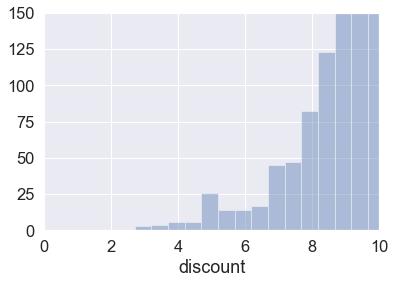

In [60]:
import seaborn as sns
sns.set(font_scale=1.5)
g = sns.distplot(dis_data['discount'], kde=False)
g.set_xlim(0, 10)
g.set_ylim(0, 150)

In [61]:
dis_data[dis_data['discount']<7].groupby('fields.shortInfo')['fields.title'].count().nlargest(5)

fields.shortInfo
桂林    16
上海    12
香港    10
三亚     7
深圳     6
Name: fields.title, dtype: int64

#### 7. 各级别景区的门票价格

In [62]:
data_final.sample(5)

,city,fields.comment,fields.discountPrice,fields.features,fields.itemId,fields.itemTotalScore,fields.latitude,fields.longitude,fields.price,fields.shortInfo,fields.sold365,fields.soldRecentNum,fields.tagList,fields.title,trip_main_busness_type,province,discount
39367,丽江,0.0,299.0,出票1小时后可用,906960946,0.0,0.0000,0.000,299.0,丽江,NaN,0,None,云南丽江拉市海湿地公园 丽江千古情(贵宾)+拉市海湿地公园(门票),vocation,云南省,10.0
35436,三亚,0.0,330.0,出票后立即可用,-165930551,0.0,0.0000,0.000,330.0,三亚,NaN,0,None,免费接送三亚槟榔谷门票+观光车+滑索+免费接送+千古情门票贵宾席,vocation,海南省,10.0
44937,上海,NaN,35.9,1秒萌化你的心,37902846,NaN,31.2346,121.476,35.9,NaN,NaN,270,None,世茂Hello Kitty上海滩时光之旅,scenic,上海市,10.0
5454,泰州,58.0,69.0,07:59前可订今日票,1474528201,5.0,0.0000,0.000,69.0,泰州,2621.0,99,None,【当天8点前可订 1秒出票】泰州 溱湖国家湿地公园 门票 电子票,vocation,江苏省,10.0
6975,无锡,3.0,94.0,最早可定明日票,1834432937,5.0,0.0000,0.000,94.0,无锡,35.0,0,None,【自动出票】无锡宜兴张公洞门票联票 含溶洞+陶吧+漂流+地下河,vocation,江苏省,10.0


In [63]:
level = ['A', 'AA', 'AAA', '4A景区', '5A景区']
level_data = data_final.groupby('fields.tagList')['fields.price'].mean()[level]

In [64]:
data_final.groupby('fields.tagList')['fields.price'].mean()

fields.tagList
4A景区     79.781033
5A景区    121.984286
A        72.377778
AA       71.005000
AAA      53.908148
今日可用    162.322308
山        95.000000
明日可用    158.617455
景点      142.800000
演出      276.666667
赛事      150.000000
Name: fields.price, dtype: float64

In [65]:
level_data

fields.tagList
A        72.377778
AA       71.005000
AAA      53.908148
4A景区     79.781033
5A景区    121.984286
Name: fields.price, dtype: float64

In [66]:
bar = Bar("各级别景区的门票价格", width = 500,height=500)
bar.add("", level_data.index, np.round(level_data.values,0), is_stack=True, 
       xaxis_label_textsize=18, yaxis_label_textsize=14, is_label_show=True)
bar